In [1]:
import pandas as pd 
import os 
print ('hello world')

### Merge months of data to single data file

In [16]:
df1 = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
files = os.listdir('./Sales_Data/')
df = pd.DataFrame()
for file in files:
    df1 = pd.read_csv('./Sales_Data/'+file)
    df = pd.concat([df,df1])
df.head()
df.to_csv('Single_File.csv')

(18383, 6)


In [59]:
df = pd.read_csv('Single_File.csv')
print(df.shape)
df.head()

(186849, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean Up the data

In [60]:
nan_df = df[df.isna().any(axis = 1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185175,NaN,NaN,NaN,NaN,NaN,NaN
185437,NaN,NaN,NaN,NaN,NaN,NaN
186041,NaN,NaN,NaN,NaN,NaN,NaN
186547,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.dropna(inplace = True)

In [62]:
df.isna().any()

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

### Clean Up Month having 'Or' as a value

In [64]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [65]:
df = df[df['Month']!='Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186844,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186845,259354,iPhone,1,700,09-01-2019 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186846,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186847,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


### Convert columns to proper datatypes

In [66]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


###  What is the month having the largest number of sales and how much?

In [49]:
df['Month'] = df['Month'].astype('int32')

In [67]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


In [83]:
results = df.groupby(['Month']).sum()
results = results.reset_index()
results

,Month,Quantity Ordered,Price Each,Sales
0,01,10903,1.811768e+06,1.822257e+06
1,02,13449,2.188885e+06,2.202022e+06
2,03,17005,2.791208e+06,2.807100e+06
3,04,20558,3.367671e+06,3.390670e+06
4,05,18667,3.135125e+06,3.152607e+06
5,06,15253,2.562026e+06,2.577802e+06
6,07,16072,2.632540e+06,2.647776e+06
7,08,13448,2.230345e+06,2.244468e+06
8,09,13109,2.084992e+06,2.097560e+06
9,10,22703,3.715555e+06,3.736727e+06


Text(0.5, 0, 'Month')

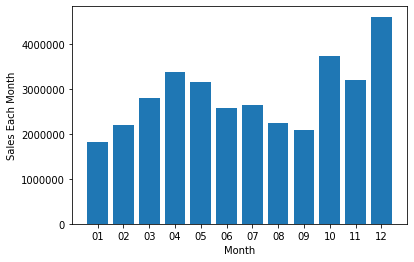

In [86]:
import matplotlib.pyplot as plt
plt.bar(results['Month'],results['Sales'])
plt.ylabel('Sales Each Month')
plt.xlabel('Month')

### December Has the highest sales in year

## add a city column

In [95]:
df['City'] = df['Purchase Address'].apply(lambda x:x.split(',')[1]+' '+'('+x.split(',')[2].split()[0]+')')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


## Which city has highest number of sales 

In [103]:
results = df.groupby('City').sum()
results = results.reset_index()
results

,City,Quantity Ordered,Price Each,Sales
0,Atlanta (GA),16602,2.779908e+06,2.795499e+06
1,Austin (TX),11153,1.809874e+06,1.819582e+06
2,Boston (MA),22528,3.637410e+06,3.661642e+06
3,Dallas (TX),16730,2.752628e+06,2.767975e+06
4,Los Angeles (CA),33289,5.421435e+06,5.452571e+06
5,New York City (NY),27932,4.635371e+06,4.664317e+06
6,Portland (ME),2750,4.471893e+05,4.497583e+05
7,Portland (OR),11303,1.860558e+06,1.870732e+06
8,San Francisco (CA),50239,8.211462e+06,8.262204e+06
9,Seattle (WA),16553,2.733296e+06,2.747755e+06


Text(0.5, 0, 'City')

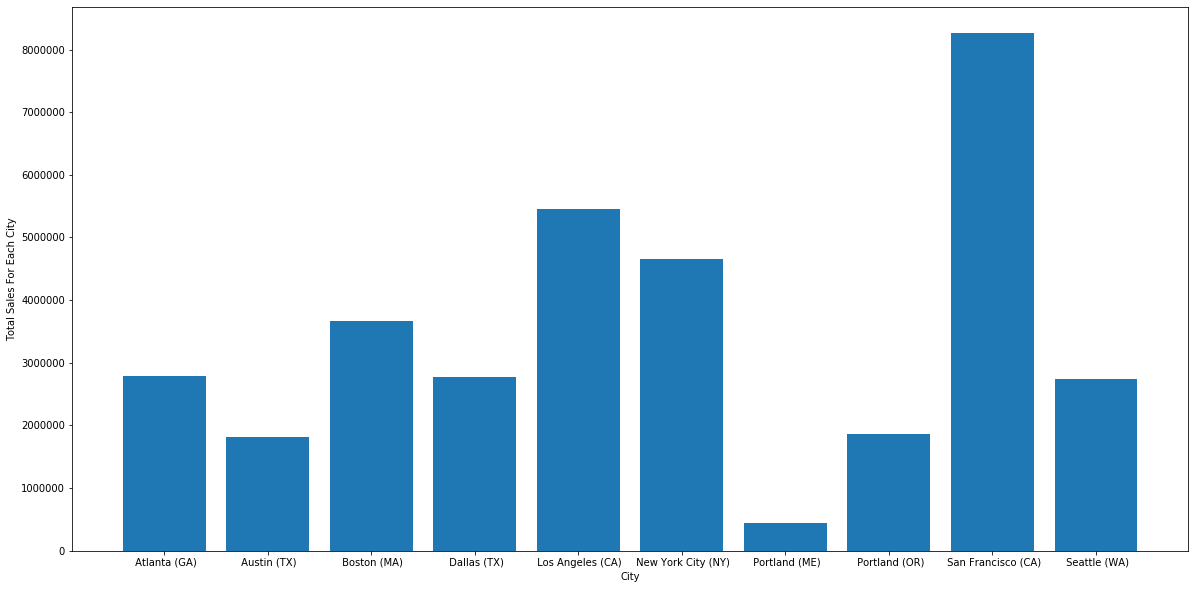

In [109]:
plt.subplots(figsize = (20,10))
plt.bar(results['City'],results['Sales'])
plt.ylabel('Total Sales For Each City')
plt.xlabel('City')

## San Francico Has the Highest number of sales 

## What is the time we should display the advertisement to maximize the sales?


#### Change the Ordered date to proper datetime format

In [111]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [112]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA)


In [113]:
df['Hours'] = df['Order Date'].dt.hour

In [114]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9


In [117]:
results = df.groupby('Hours').sum()

In [119]:
results = results.reset_index()

In [120]:
results

,Hours,Quantity Ordered,Price Each,Sales
0,0,4428,709296.70,713721.27
1,1,2619,458490.00,460866.88
2,2,1398,233833.64,234851.44
3,3,928,144726.42,145757.89
4,4,937,162058.18,162661.01
5,5,1493,229621.21,230679.82
6,6,2810,445000.11,448113.00
7,7,4556,740568.11,744854.12
8,8,7002,1185970.62,1192348.97
9,9,9816,1628498.49,1639030.58


Text(0, 0.5, 'Sales')

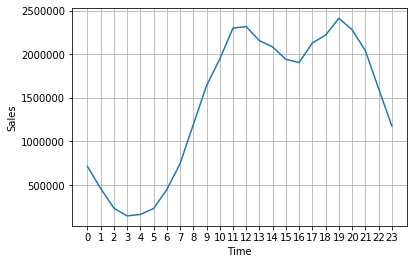

In [125]:
plt.plot(results['Hours'],results['Sales'])
plt.xlabel('Time')
plt.xticks(range(0,24))
plt.grid()
plt.ylabel('Sales')

### Ideal Time for advertisement is around 9-10 am and 5-6 pm

### Which Products are often brought together?


In [129]:
df1 = df[df['Order ID'].duplicated(keep = False)]
df1['Grouped Items'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Grouped Items
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",04,11.95,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",04,99.99,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [131]:
df1 = df1[['Order ID','Grouped Items']].drop_duplicates()
df1.head()

,Order ID,Grouped Items
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


## Which items were sold together most frequently?

In [136]:
from itertools import combinations
from collections import Counter
count = Counter()
for rows in df1['Grouped Items']:
    rows_list = rows.split(',')
    count.update(combinations(rows_list,2))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## Which Products were sold the most?



In [137]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles (CA),9


In [139]:
result = df.groupby('Product').sum()
result = result.reset_index()

In [159]:
result

,Product,Quantity Ordered,Price Each,Sales,Hours,Price
0,20in Monitor,4129,451068.99,454148.71,58764,NaN
1,27in 4K Gaming Monitor,6244,2429637.70,2435097.56,90916,NaN
2,27in FHD Monitor,7550,1125974.93,1132424.50,107540,NaN
3,34in Ultrawide Monitor,6199,2348718.19,2355558.01,89076,NaN
4,AA Batteries (4-pack),27635,79015.68,106118.40,298342,NaN
5,AAA Batteries (4-pack),31017,61716.59,92740.83,297332,NaN
6,Apple Airpods Headphones,15661,2332350.00,2349150.00,223304,NaN
7,Bose SoundSport Headphones,13457,1332366.75,1345565.43,192445,NaN
8,Flatscreen TV,4819,1440000.00,1445700.00,68815,NaN
9,Google Phone,5532,3315000.00,3319200.00,79479,NaN


In [164]:
price = df.groupby('Product').mean()['Price Each']
price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

Text(0, 0.5, 'Quantity')

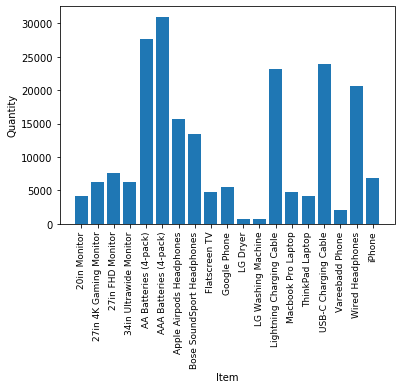

In [148]:
plt.bar(result['Product'],result['Quantity Ordered'])
plt.xlabel('Item')
plt.xticks(rotation = 'vertical',size = 9)
plt.ylabel('Quantity')

## Add prices to the items graph

Text(0, 0.5, 'Price')

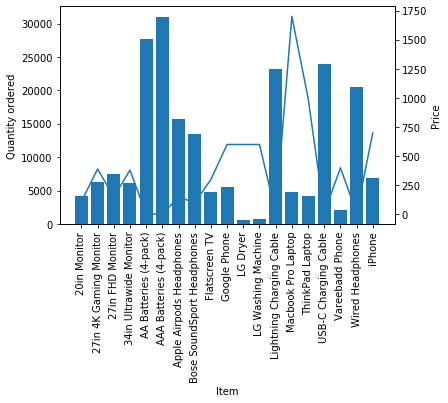

In [170]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(result['Product'],result['Quantity Ordered'])
ax1.set_ylabel('Quantity ordered')
ax1.set_xlabel('Item')
ax1.set_xticklabels(result['Product'],rotation = 'vertical')
ax2.plot(result['Product'],price)
ax2.set_ylabel('Price')